# E-Commerce Data Analysis and Forecasting

## Import necessary libraries

In [1]:
import os

In [2]:
import findspark

## Set up OS environment

In [3]:
os.environ["JAVA_HOME"]="/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"]="/home/niharika/spark-3.2.0-bin-hadoop3.2"

In [4]:
os.environ["HADOOP_HOME"]="/home/niharika/hadoop-3.3.1"

## Initialize spark session

In [5]:
findspark.init()
from pyspark.sql import SparkSession
spark=SparkSession.builder.master("local[*]").getOrCreate()

22/01/22 15:44:24 WARN Utils: Your hostname, niharika-VirtualBox resolves to a loopback address: 127.0.1.1; using 10.0.2.15 instead (on interface enp0s3)
22/01/22 15:44:24 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/01/22 15:44:25 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [6]:
df = spark.read.csv("hdfs://localhost:9000/user/input/data.csv", header=True)

In [7]:
df.createOrReplaceTempView("ecom")

## Display csv file in the form of SQL table

In [8]:
spark.sql("select * from ecom").show()

+---------+---------+--------------------+--------+--------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|   InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+--------------+---------+----------+--------------+
|   536365|   85123A|WHITE HANGING HEA...|       6|12/1/2010 8:26|     2.55|     17850|United Kingdom|
|   536365|    71053| WHITE METAL LANTERN|       6|12/1/2010 8:26|     3.39|     17850|United Kingdom|
|   536365|   84406B|CREAM CUPID HEART...|       8|12/1/2010 8:26|     2.75|     17850|United Kingdom|
|   536365|   84029G|KNITTED UNION FLA...|       6|12/1/2010 8:26|     3.39|     17850|United Kingdom|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6|12/1/2010 8:26|     3.39|     17850|United Kingdom|
|   536365|    22752|SET 7 BABUSHKA NE...|       2|12/1/2010 8:26|     7.65|     17850|United Kingdom|
|   536365|    21730|GLASS STAR FROSTE...|       6|12/1/2010 8:26|     4.

## Total number of records in e-commerce table

In [9]:
spark.sql("select count(*) from ecom").show()

+--------+
|count(1)|
+--------+
|  541909|
+--------+



## Co relation between columns

In [10]:
from pyspark.sql.functions import *
df1=df.groupBy("Description") \
      .agg({"Quantity":"sum"}).select("Description",col("sum(Quantity)")).alias("total_quantity")

## Relation between Products description and quantity of products sold

In [11]:
df1.show()

+--------------------+-------------+
|         Description|sum(Quantity)|
+--------------------+-------------+
|10 COLOUR SPACEBO...|       6392.0|
|SET/10 BLUE POLKA...|       3966.0|
|POTTING SHED SOW ...|          2.0|
|PAPERWEIGHT KINGS...|        162.0|
|WOVEN BERRIES CUS...|        162.0|
|WHITE/PINK MINI C...|         10.0|
|SET/3 RED GINGHAM...|       2999.0|
|MAGNETS PACK OF 4...|       1311.0|
|WHITE CHRYSANTHEM...|         53.0|
|WHITE FRANGIPANI ...|         33.0|
|SILVER FABRIC MIRROR|        458.0|
|PINK  HONEYCOMB P...|        489.0|
|PINK BOUDOIR T-LI...|         12.0|
| BLACK CHERRY LIGHTS|          0.0|
|GLASS CAKE COVER ...|          0.0|
|DECORATION SITTIN...|       1441.0|
|ANTIQUE MID BLUE ...|          5.0|
|IVORY ENCHANTED F...|        512.0|
|ANTIQUE SILVER TE...|       4539.0|
|BLUE FELT HANGING...|         16.0|
+--------------------+-------------+
only showing top 20 rows



In [12]:
df.groupBy("Description") \
  .agg(sum("Quantity").alias("Total_Quantity")) \
  .sort(col("Total_Quantity").asc()) \
  .show()

+--------------------+--------------+
|         Description|Total_Quantity|
+--------------------+--------------+
|printing smudges/...|      -19200.0|
|Unsaleable, destr...|      -15644.0|
|                null|      -13609.0|
|               check|      -12030.0|
|Printing smudges/...|       -9058.0|
|             Damaged|       -7540.0|
|          throw away|       -5368.0|
|             damages|       -4338.0|
|incorrect stock e...|       -4320.0|
|         thrown away|       -4110.0|
|wrongly marked. 2...|       -3100.0|
|         damages wax|       -2844.0|
|mouldy, thrown away.|       -2600.0|
|thrown away-can't...|       -2472.0|
|sold as set on do...|       -2393.0|
|   Thrown away-rusty|       -2376.0|
|            ?missing|       -2331.0|
|                  ??|       -1849.0|
| mouldy, unsaleable.|       -1681.0|
|             damaged|       -1632.0|
+--------------------+--------------+
only showing top 20 rows



#### The above table shows negative quantity values as these products were not sold/damaged

In [13]:
df.groupBy("Description") \
  .agg(sum("Quantity").alias("Total_Quantity")) \
  .sort(col("Total_Quantity").desc()) \
  .show()

+--------------------+--------------+
|         Description|Total_Quantity|
+--------------------+--------------+
|WORLD WAR 2 GLIDE...|       53847.0|
|JUMBO BAG RED RET...|       47363.0|
|ASSORTED COLOUR B...|       36381.0|
|      POPCORN HOLDER|       36334.0|
|PACK OF 72 RETROS...|       36039.0|
|WHITE HANGING HEA...|       35317.0|
|  RABBIT NIGHT LIGHT|       30680.0|
|MINI PAINT SET VI...|       26437.0|
|PACK OF 12 LONDON...|       26315.0|
|PACK OF 60 PINK P...|       24753.0|
|VICTORIAN GLASS H...|       23854.0|
|ASSORTED COLOURS ...|       23082.0|
| BROCADE RING PURSE |       23053.0|
|RED  HARMONICA IN...|       21866.0|
|JUMBO BAG PINK PO...|       21009.0|
|SMALL POPCORN HOLDER|       20116.0|
|PAPER CHAIN KIT 5...|       18902.0|
|LUNCH BAG RED RET...|       18779.0|
|60 TEATIME FAIRY ...|       18040.0|
|       PARTY BUNTING|       18022.0|
+--------------------+--------------+
only showing top 20 rows



#### The above table shows the description of the maximum product sold i.e, World war 2 gliders asstd designs followed by Jumbo bag red retrospot.

### Relation between products description and quantity wrt Country

In [14]:
df.groupBy("Description","Country") \
  .agg(sum("Quantity").alias("Total_Quantity")) \
  .show()

+--------------------+--------------+--------------+
|         Description|       Country|Total_Quantity|
+--------------------+--------------+--------------+
|HOMEMADE JAM SCEN...|United Kingdom|       10282.0|
|FAMILY PHOTO FRAM...|United Kingdom|         807.0|
|GREEN DRAWER KNOB...|United Kingdom|        1919.0|
|ASSORTED COLOUR L...|       Germany|          48.0|
|KITTENS DESIGN FL...|United Kingdom|         289.0|
|      FUNKY DIVA PEN|United Kingdom|        7236.0|
|ANT COPPER RED BO...|United Kingdom|          24.0|
|MIRRORED WALL ART...|United Kingdom|          68.0|
|SKULLS AND CROSSB...|United Kingdom|        5500.0|
|POLYESTER FILLER ...|United Kingdom|         103.0|
|CERAMIC CAKE BOWL...|United Kingdom|         510.0|
|  KIDS RAIN MAC BLUE|United Kingdom|         867.0|
|   WRAP GREEN PEARS |          EIRE|          50.0|
| HAPPY STENCIL CRAFT|United Kingdom|        2523.0|
|IVORY KITCHEN SCALES|       Germany|          66.0|
|GUMBALL MAGAZINE ...|       Germany|         

In [15]:
df.groupBy("Description","Country") \
  .agg(sum("Quantity").alias("Total_Quantity")) \
  .sort(col("Total_Quantity").desc()) \
  .show()

+--------------------+--------------+--------------+
|         Description|       Country|Total_Quantity|
+--------------------+--------------+--------------+
|WORLD WAR 2 GLIDE...|United Kingdom|       48326.0|
|JUMBO BAG RED RET...|United Kingdom|       43167.0|
|      POPCORN HOLDER|United Kingdom|       34365.0|
|ASSORTED COLOUR B...|United Kingdom|       33679.0|
|WHITE HANGING HEA...|United Kingdom|       33193.0|
|PACK OF 12 LONDON...|United Kingdom|       25307.0|
|PACK OF 72 RETROS...|United Kingdom|       24702.0|
|VICTORIAN GLASS H...|United Kingdom|       23242.0|
| BROCADE RING PURSE |United Kingdom|       22801.0|
|ASSORTED COLOURS ...|United Kingdom|       20322.0|
|PACK OF 60 PINK P...|United Kingdom|       20288.0|
|JUMBO BAG PINK PO...|United Kingdom|       18936.0|
|SMALL POPCORN HOLDER|United Kingdom|       18563.0|
|PAPER CHAIN KIT 5...|United Kingdom|       18197.0|
|RED  HARMONICA IN...|United Kingdom|       17754.0|
|HEART OF WICKER S...|United Kingdom|       17

#### From the above table we can say that maximum products are sold to people living in the United Kingdom.Products like World war 2 gliders asstd designs,Jumbo bag red retrospot, Popcorn holder and so on.. 

In [16]:
df.groupBy("Description","Country") \
  .agg(sum("Quantity").alias("Total_Quantity")) \
  .sort(col("Total_Quantity").asc()) \
  .show()

+--------------------+--------------+--------------+
|         Description|       Country|Total_Quantity|
+--------------------+--------------+--------------+
|printing smudges/...|United Kingdom|      -19200.0|
|Unsaleable, destr...|United Kingdom|      -15644.0|
|                null|United Kingdom|      -13609.0|
|               check|United Kingdom|      -12030.0|
|Printing smudges/...|United Kingdom|       -9058.0|
|             Damaged|United Kingdom|       -7540.0|
|          throw away|United Kingdom|       -5368.0|
|             damages|United Kingdom|       -4338.0|
|incorrect stock e...|United Kingdom|       -4320.0|
|         thrown away|United Kingdom|       -4110.0|
|wrongly marked. 2...|United Kingdom|       -3100.0|
|         damages wax|United Kingdom|       -2844.0|
|mouldy, thrown away.|United Kingdom|       -2600.0|
|thrown away-can't...|United Kingdom|       -2472.0|
|sold as set on do...|United Kingdom|       -2393.0|
|   Thrown away-rusty|United Kingdom|       -2

### Relation between customers and their spending score

In [17]:
df2=df.groupBy("CustomerID") \
      .agg({"UnitPrice":"sum"}).select("CustomerID",col("sum(UnitPrice)")).alias("total_quantity")

In [18]:
df2.show()

+----------+------------------+
|CustomerID|    sum(UnitPrice)|
+----------+------------------+
|     16250|             74.12|
|     15574| 422.7499999999997|
|     15555|1563.8299999999963|
|     15271| 754.0599999999993|
|     17714|              20.5|
|     17686|1103.6399999999994|
|     13865|            117.07|
|     14157|            108.43|
|     13610| 667.0999999999995|
|     13772| 436.1099999999999|
|     13282|            186.07|
|     12394|             91.01|
|     16320|138.91000000000003|
|     13192|            165.61|
|     17757|2041.7800000000038|
|     17551|            109.27|
|     13187|            139.32|
|     16549|1997.6900000000055|
|     12637|1060.1899999999978|
|     15052|105.33999999999999|
+----------+------------------+
only showing top 20 rows



In [19]:
df.groupBy("CustomerID") \
  .agg(sum("UnitPrice").alias("Total")) \
  .sort(col("Total").desc()) \
  .show()

+----------+------------------+
|CustomerID|             Total|
+----------+------------------+
|      null|1090984.0100000917|
|     14096| 41376.33000000013|
|     15098|40278.899999999994|
|     14911|31060.660000000524|
|     12744|25108.890000000007|
|     16029| 24111.14000000003|
|     17841|20333.180000000022|
|     12748|15115.600000000006|
|     12536|13255.220000000003|
|     12757| 8035.239999999993|
|     14606| 7839.019999999957|
|     15502| 7836.839999999998|
|     14156| 6544.289999999992|
|     15311| 6267.749999999959|
|     14527| 5996.639999999981|
|     14646| 5400.209999999988|
|     13089| 5166.450000000005|
|     18102| 5159.730000000001|
|     15039|4811.7199999999875|
|     17448|           4287.63|
+----------+------------------+
only showing top 20 rows



#### The above table shows that an unregistered customer spends the highest on multiple products bought.The second highest spending score is 41376.33000000013 by a customer with ID 14096

In [20]:
df.groupBy("CustomerID","Country") \
  .agg(sum("UnitPrice").alias("Total")) \
  .sort(col("Total").desc()) \
  .show()

+----------+--------------+------------------+
|CustomerID|       Country|             Total|
+----------+--------------+------------------+
|      null|United Kingdom| 1067438.210000093|
|     14096|United Kingdom| 41376.33000000013|
|     15098|United Kingdom|40278.899999999994|
|     14911|          EIRE|31060.660000000524|
|     12744|     Singapore|25108.890000000007|
|     16029|United Kingdom| 24111.14000000003|
|     17841|United Kingdom|20333.180000000022|
|     12748|United Kingdom|15115.600000000006|
|     12536|        France|13255.220000000003|
|      null|     Hong Kong|12241.499999999993|
|      null|          EIRE|10193.610000000039|
|     12757|      Portugal| 8035.239999999993|
|     14606|United Kingdom| 7839.019999999957|
|     15502|United Kingdom| 7836.839999999998|
|     14156|          EIRE| 6544.289999999992|
|     15311|United Kingdom| 6267.749999999959|
|     14527|United Kingdom| 5996.639999999981|
|     14646|   Netherlands| 5400.209999999988|
|     13089|U

#### The above table shows that an unregistered customer living/visiting in the United Kingdom spends the highest on multiple products bought, followed by customers in Eire and Singapore.

In [21]:
spark.sql("select count(distinct(Country)) from ecom").show()

+-----------------------+
|count(DISTINCT Country)|
+-----------------------+
|                     38|
+-----------------------+



In [22]:
spark.sql("select distinct(Description) from ecom").show()

+--------------------+
|         Description|
+--------------------+
|10 COLOUR SPACEBO...|
|SET/10 BLUE POLKA...|
|POTTING SHED SOW ...|
|PAPERWEIGHT KINGS...|
|WOVEN BERRIES CUS...|
|WHITE/PINK MINI C...|
|SET/3 RED GINGHAM...|
|MAGNETS PACK OF 4...|
|WHITE CHRYSANTHEM...|
|WHITE FRANGIPANI ...|
|SILVER FABRIC MIRROR|
|PINK  HONEYCOMB P...|
|PINK BOUDOIR T-LI...|
| BLACK CHERRY LIGHTS|
|GLASS CAKE COVER ...|
|DECORATION SITTIN...|
|ANTIQUE MID BLUE ...|
|IVORY ENCHANTED F...|
|ANTIQUE SILVER TE...|
|BLUE FELT HANGING...|
+--------------------+
only showing top 20 rows



In [23]:
spark.sql("select count(distinct(Description)) from ecom").show()

+---------------------------+
|count(DISTINCT Description)|
+---------------------------+
|                       4223|
+---------------------------+



In [24]:
from pyspark.sql.types import FloatType
data_df=df.withColumn("UnitPrice", df["UnitPrice"].cast(FloatType()))

In [25]:
data_df

DataFrame[InvoiceNo: string, StockCode: string, Description: string, Quantity: string, InvoiceDate: string, UnitPrice: float, CustomerID: string, Country: string]

### Product details based on country

In [26]:
country=input()

Japan


In [27]:
spark.sql("select * from ecom where Country='{}'".format(country)).groupBy("Description").pivot("Country").agg(sum("Quantity")).show(truncate=False)

+-----------------------------------+-----+
|Description                        |Japan|
+-----------------------------------+-----+
|PACK OF 12 COLOURED PENCILS        |576.0|
|SET OF 4 NAPKIN CHARMS CUTLERY     |6.0  |
|PINK BABY BUNTING                  |50.0 |
|SET OF 2 ROUND TINS CAMEMBERT      |1.0  |
|PENNY FARTHING BIRTHDAY CARD       |72.0 |
|STORAGE TIN VINTAGE LEAF           |48.0 |
|SET/20 RED RETROSPOT PAPER NAPKINS |204.0|
|TREASURE ISLAND BOOK BOX           |1.0  |
|MONEY BOX BISCUITS DESIGN          |1.0  |
|WHITE WIRE EGG HOLDER              |12.0 |
|I LOVE LONDON BABY GIFT SET        |18.0 |
|FELTCRAFT PRINCESS CHARLOTTE DOLL  |16.0 |
|SWALLOWS GREETING CARD             |84.0 |
|TEA TIME PARTY BUNTING             |82.0 |
|CARD CAT AND TREE                  |72.0 |
|MAGIC DRAWING SLATE CIRCUS PARADE  |577.0|
|FELT FARM ANIMAL SHEEP             |1.0  |
|VINTAGE LEAF MAGNETIC NOTEPAD      |48.0 |
|SET 12 COLOUR PENCILS LOVE LONDON  |32.0 |
|PACK OF 12 LONDON TISSUES      

#### The above table shows the description of products corresponding to the quantity sold in Japan

In [28]:
spark.sql("select * from ecom where Country='{}'".format(country)).groupBy("Description").agg(sum("Quantity")).sort(col("sum(Quantity)").desc()).show(truncate=False)

+-----------------------------------+-------------+
|Description                        |sum(Quantity)|
+-----------------------------------+-------------+
|RABBIT NIGHT LIGHT                 |3401.0       |
|PACK OF 12 TRADITIONAL CRAYONS     |1201.0       |
|ROUND SNACK BOXES SET OF 4 FRUITS  |870.0        |
|MAGIC DRAWING SLATE CIRCUS PARADE  |577.0        |
|WORLD WAR 2 GLIDERS ASSTD DESIGNS  |577.0        |
|MAGIC DRAWING SLATE SPACEBOY       |577.0        |
|MAGIC DRAWING SLATE BAKE A CAKE    |577.0        |
|MAGIC DRAWING SLATE PURDEY         |577.0        |
|MINI PAINT SET VINTAGE             |577.0        |
|PACK OF 12 COLOURED PENCILS        |576.0        |
|SET 12 KIDS COLOUR  CHALK STICKS   |576.0        |
|MINI JIGSAW CIRCUS PARADE          |481.0        |
|MINI JIGSAW PURDEY                 |481.0        |
|MINI JIGSAW BAKE A CAKE            |481.0        |
|MINI JIGSAW SPACEBOY               |481.0        |
|CHARLOTTE BAG DOLLY GIRL DESIGN    |398.0        |
|BASKET OF T

#### The above table shows the description of products corresponding to the quantity sold in Japan from highest to lowest.

In [29]:
spark.sql("select * from ecom where Country='{}'".format(country)).groupBy("Description").agg(sum("Quantity")).sort(col("sum(Quantity)").asc()).show(truncate=False)

+--------------------------------+-------------+
|Description                     |sum(Quantity)|
+--------------------------------+-------------+
|Manual                          |-3.0         |
|MONEY BOX CONFECTIONERY DESIGN  |1.0          |
|MONEY BOX BISCUITS DESIGN       |1.0          |
|SET OF 2 ROUND TINS CAMEMBERT   |1.0          |
|GOLD MINI TAPE MEASURE          |1.0          |
|TREASURE ISLAND BOOK BOX        |1.0          |
|FELT FARM ANIMAL SHEEP          |1.0          |
|FELT FARM ANIMAL CHICKEN        |1.0          |
|MINI JIGSAW DOLLY GIRL          |1.0          |
|INFLATABLE POLITICAL GLOBE      |1.0          |
|MONEY BOX FIRST ADE DESIGN      |1.0          |
|GYMKHANA TREASURE BOOK BOX      |1.0          |
|EASTER DECORATION EGG BUNNY     |1.0          |
|BLACK MINI TAPE MEASURE         |1.0          |
|TRAVEL CARD WALLET PANTRY       |1.0          |
|MONEY BOX POCKET MONEY DESIGN   |1.0          |
|GLASS JAR ENGLISH CONFECTIONERY |1.0          |
|BUFFALO BILL TREASU

#### The above table shows the description of products corresponding to the quantity sold in Japan from lowest to highest.

In [30]:
spark.sql("select * from ecom where Country='{}'".format(country)).groupBy("Description").pivot("Country").agg(sum("UnitPrice")).show(truncate=False)

+-----------------------------------+-----+
|Description                        |Japan|
+-----------------------------------+-----+
|PACK OF 12 COLOURED PENCILS        |0.72 |
|SET OF 4 NAPKIN CHARMS CUTLERY     |2.55 |
|PINK BABY BUNTING                  |2.55 |
|SET OF 2 ROUND TINS CAMEMBERT      |2.95 |
|PENNY FARTHING BIRTHDAY CARD       |0.36 |
|STORAGE TIN VINTAGE LEAF           |2.49 |
|SET/20 RED RETROSPOT PAPER NAPKINS |2.21 |
|TREASURE ISLAND BOOK BOX           |2.25 |
|MONEY BOX BISCUITS DESIGN          |1.25 |
|WHITE WIRE EGG HOLDER              |4.95 |
|I LOVE LONDON BABY GIFT SET        |14.95|
|FELTCRAFT PRINCESS CHARLOTTE DOLL  |3.75 |
|SWALLOWS GREETING CARD             |0.78 |
|TEA TIME PARTY BUNTING             |8.7  |
|CARD CAT AND TREE                  |0.36 |
|MAGIC DRAWING SLATE CIRCUS PARADE  |0.78 |
|FELT FARM ANIMAL SHEEP             |1.25 |
|VINTAGE LEAF MAGNETIC NOTEPAD      |1.25 |
|SET 12 COLOUR PENCILS LOVE LONDON  |0.65 |
|PACK OF 12 LONDON TISSUES      

In [31]:
spark.sql("select * from ecom where Country='{}'".format(country)).groupBy("Description").agg(sum("UnitPrice")).sort(col("sum(UnitPrice)").asc()).show(truncate=False)

+---------------------------------+--------------+
|Description                      |sum(UnitPrice)|
+---------------------------------+--------------+
|PACK OF 12 CIRCUS PARADE TISSUES |0.29          |
|CARD CAT AND TREE                |0.36          |
|PENNY FARTHING BIRTHDAY CARD     |0.36          |
|SET 12 KIDS COLOUR  CHALK STICKS |0.36          |
|ELEPHANT, BIRTHDAY CARD,         |0.36          |
|SWALLOW SQUARE TISSUE BOX        |0.39          |
|MAGNETS PACK OF 4 VINTAGE COLLAGE|0.39          |
|PACK OF 12 VINTAGE DOILY TISSUES |0.39          |
|MAGNETS PACK OF 4 SWALLOWS       |0.39          |
|FANCY FONT BIRTHDAY CARD,        |0.42          |
|CARD BILLBOARD FONT              |0.42          |
|MINI JIGSAW DOLLY GIRL           |0.42          |
|TRAVEL CARD WALLET UNION JACK    |0.42          |
|TRAVEL CARD WALLET VINTAGE TICKET|0.42          |
|CARD GINGHAM ROSE                |0.42          |
|POLKADOT RAIN HAT                |0.42          |
|MAGIC DRAWING SLATE LEAP FROG 

#### The product with the lowest price in Japan is a pack of 12 circus parade tissues.

In [32]:
spark.sql("select * from ecom where Country='{}'".format(country)).groupBy("Description").agg(sum("UnitPrice")).sort(col("sum(UnitPrice)").desc()).show(truncate=False)

+----------------------------------+------------------+
|Description                       |sum(UnitPrice)    |
+----------------------------------+------------------+
|Manual                            |79.17             |
|RED RETROSPOT ROUND CAKE TINS     |26.849999999999998|
|RED SPOTTY BISCUIT TIN            |22.75             |
|DELUXE SEWING KIT                 |21.8              |
|RED RETROSPOT MINI CASES          |19.049999999999997|
|SET 3 RETROSPOT TEA,COFFEE,SUGAR  |17.0              |
|SET OF 4 KNICK KNACK TINS LONDON  |15.0              |
|I LOVE LONDON BABY GIFT SET       |14.95             |
|VICTORIAN SEWING BOX SMALL        |14.850000000000001|
|PARTY BUNTING                     |12.55             |
|SET OF 4 KNICK KNACK TINS LEAF    |11.25             |
|PAPER BUNTING COLOURED LACE       |10.2              |
|ROSE COTTAGE KEEPSAKE BOX         |9.95              |
|RABBIT NIGHT LIGHT                |8.95              |
|NURSE'S BAG SOFT TOY              |8.95        

#### The product with the highest price in Japan is a manual.

### Importing libraries for data visualization

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

In [34]:
from pyspark.sql.types import IntegerType
data1_df=df.withColumn("Quantity", df["Quantity"].cast(IntegerType()))

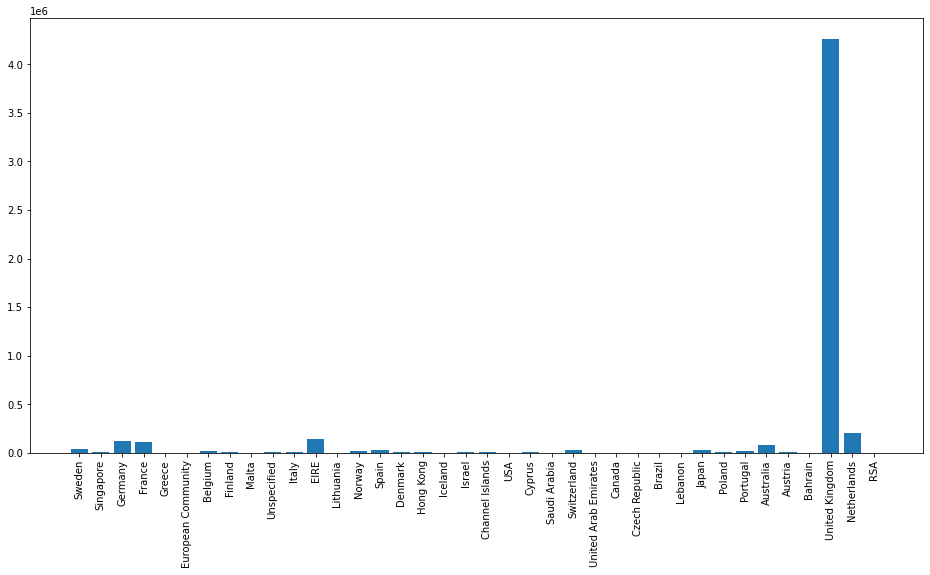

In [35]:
dfPlot= data1_df.groupBy("Country").sum("Quantity")
x=dfPlot.toPandas()["Country"].values.tolist()
y=dfPlot.toPandas()["sum(Quantity)"].values.tolist()
fig=plt.figure(figsize=(16,8))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

#### The above graph shows that the United Kingdom has sold the maximum number of products in the year 2010 and 2011

In [36]:
datax=df.toPandas()

In [37]:
datax

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.1,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680,France


In [38]:
datax["Quantity"]=datax["Quantity"].astype(int)

In [39]:
datax

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.1,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680,France


In [40]:
datax.dtypes

InvoiceNo      object
StockCode      object
Description    object
Quantity        int64
InvoiceDate    object
UnitPrice      object
CustomerID     object
Country        object
dtype: object

/home/niharika/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Country', ylabel='Quantity'>

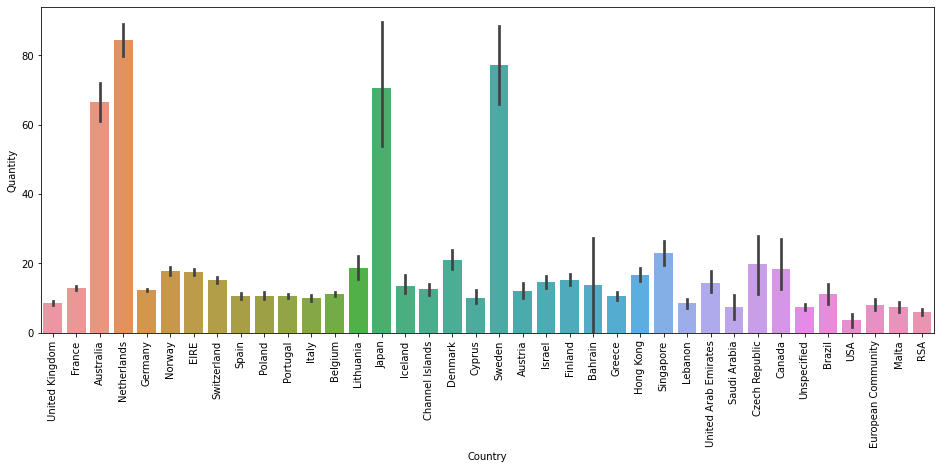

In [41]:
import seaborn as sns
plt.figure(figsize=(16, 6))
plt.xticks(rotation=90)
sns.barplot(datax['Country'], datax['Quantity'])

#### The above graph shows that Netherlands has sold a particular product to a single customer in high number, followed by Sweden and Japan

In [42]:
datax["UnitPrice"]=datax["UnitPrice"].astype(float)

/home/niharika/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Country', ylabel='UnitPrice'>

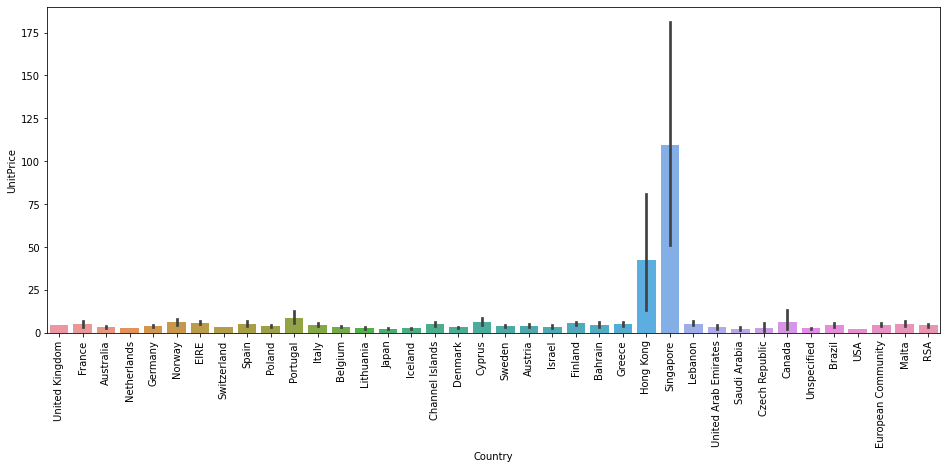

In [43]:
plt.figure(figsize=(16, 6))
plt.xticks(rotation=90)
sns.barplot(datax['Country'], datax['UnitPrice'])

#### The above graph shows that the customers in Singapore have the highest spending score.

/home/niharika/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Country', ylabel='count'>

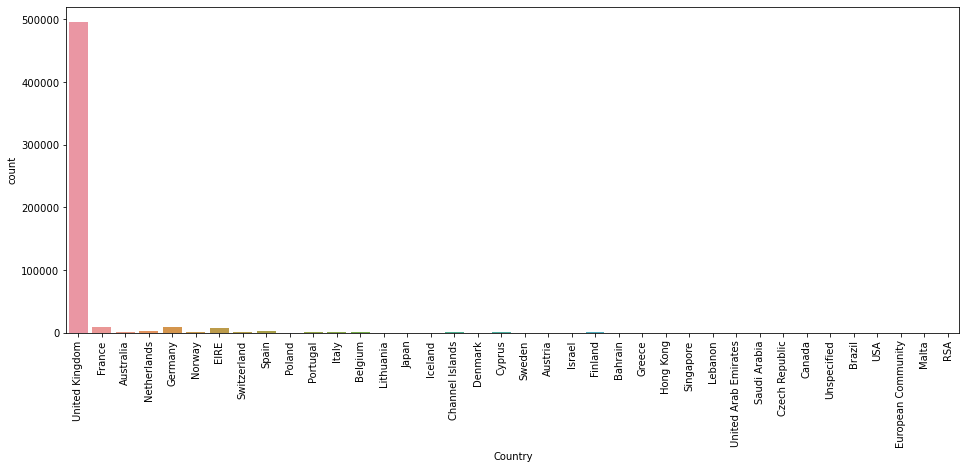

In [44]:
plt.figure(figsize=(16, 6))
plt.xticks(rotation=90)
sns.countplot(datax['Country'])

#### The above graph shows that the highest purshase score is from the customers staying in the United Kingdom

In [45]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime, nltk, warnings
import matplotlib.cm as cm
import itertools
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
%matplotlib inline

In [46]:
temp = datax[['CustomerID', 'InvoiceNo', 'Country']].groupby(['CustomerID', 'InvoiceNo', 'Country']).count()
temp = temp.reset_index(drop = False)
countries = temp['Country'].value_counts()
print('No of countries: {}'.format(len(countries)))

No of countries: 37


In [47]:
dat = dict(type='choropleth',
locations = countries.index,
locationmode = 'country names', z = countries,
text = countries.index, colorbar = {'title':'Order no.'},
colorscale=[[0, 'rgb(224,255,255)'],
            [0.01, 'rgb(166,206,227)'], [0.02, 'rgb(31,120,180)'],
            [0.03, 'rgb(178,223,138)'], [0.05, 'rgb(51,160,44)'],
            [0.10, 'rgb(251,154,153)'], [0.20, 'rgb(255,255,0)'],
            [1, 'rgb(227,26,28)']],    
reversescale = False)
#_______________________
layout = dict(title='Number of orders per country',
geo = dict(showframe = True, projection={'type':'mercator'}))
#______________
choromap = go.Figure(data = [dat], layout = layout)
iplot(choromap, validate=False)

## Forecasting

In [48]:
d_parser = lambda x: pd.datetime.strptime(x, '%m/%d/%Y %H:%M')
datax = pd.read_csv('/home/niharika/data.csv', encoding= 'unicode_escape',parse_dates=['InvoiceDate'], date_parser=d_parser)

In [49]:
datax.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [50]:
datax.loc[0, 'InvoiceDate'].day_name()

'Wednesday'

In [51]:
datax['InvoiceDate'].dt.day_name()

0         Wednesday
1         Wednesday
2         Wednesday
3         Wednesday
4         Wednesday
            ...    
541904       Friday
541905       Friday
541906       Friday
541907       Friday
541908       Friday
Name: InvoiceDate, Length: 541909, dtype: object

In [52]:
datax['DayOfWeek'] = datax['InvoiceDate'].dt.day_name()

In [53]:
datax

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,DayOfWeek
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,Friday
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,Friday
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,Friday
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,Friday


In [54]:
datax['InvoiceDate'].min()

Timestamp('2010-12-01 08:26:00')

In [55]:
datax['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [56]:
datax['InvoiceDate'].max() - datax['InvoiceDate'].min()

Timedelta('373 days 04:24:00')

In [57]:
filt = (datax['InvoiceDate'] >= pd.to_datetime('2010-12-21')) & (datax['InvoiceDate'] < pd.to_datetime('2011-11-01'))
datax.loc[filt]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,DayOfWeek
39641,539658,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-21 09:34:00,2.95,17213.0,United Kingdom,Tuesday
39642,539658,84949,SILVER HANGING T-LIGHT HOLDER,6,2010-12-21 09:34:00,1.65,17213.0,United Kingdom,Tuesday
39643,539658,21756,BATH BUILDING BLOCK WORD,3,2010-12-21 09:34:00,5.95,17213.0,United Kingdom,Tuesday
39644,539658,22977,DOLLY GIRL CHILDRENS EGG CUP,12,2010-12-21 09:34:00,1.25,17213.0,United Kingdom,Tuesday
39645,539658,84032B,CHARLIE + LOLA RED HOT WATER BOTTLE,6,2010-12-21 09:34:00,2.95,17213.0,United Kingdom,Tuesday
...,...,...,...,...,...,...,...,...,...
431668,573695,23407,SET OF 2 TRAYS HOME SWEET HOME,2,2011-10-31 17:13:00,9.95,15023.0,United Kingdom,Monday
431669,573695,23543,WALL ART KEEP CALM,1,2011-10-31 17:13:00,8.25,15023.0,United Kingdom,Monday
431670,573695,23397,FOOT STOOL HOME SWEET HOME,4,2011-10-31 17:13:00,9.95,15023.0,United Kingdom,Monday
431671,573726,72817,check,-67,2011-10-31 17:18:00,0.00,NaN,United Kingdom,Monday


In [58]:
datax.set_index('InvoiceDate', inplace=True)

In [59]:
datax

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,DayOfWeek
InvoiceDate,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,Wednesday
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,Wednesday
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,Wednesday
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,Wednesday
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,Wednesday
...,...,...,...,...,...,...,...,...
2011-12-09 12:50:00,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France,Friday
2011-12-09 12:50:00,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,Friday
2011-12-09 12:50:00,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,Friday


In [60]:
datax['2010-01':'2011-02']['UnitPrice'].mean()

5.323229885603297

In [61]:
datax['2010-01':'2011-02']['UnitPrice'].max()

16888.02

In [62]:
highs = datax['UnitPrice'].resample('D').sum()
highs['2011-12-09']

9226.48

In [63]:
%matplotlib inline

<AxesSubplot:xlabel='InvoiceDate'>

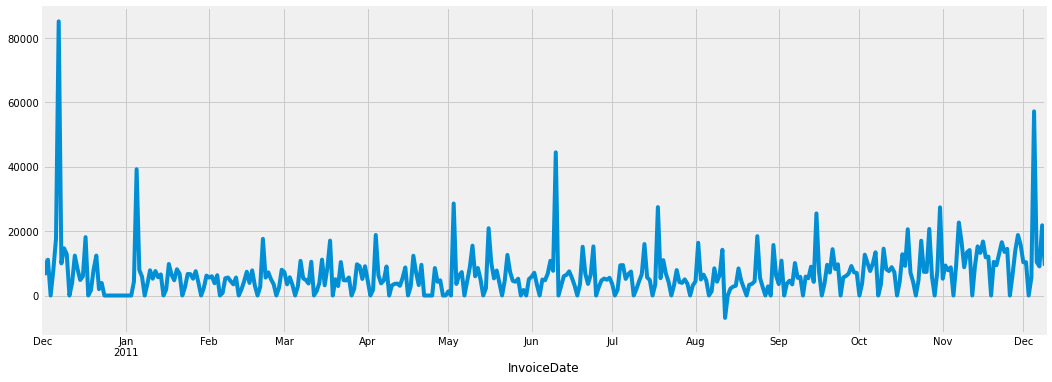

In [64]:
plt.figure(figsize=(16, 6))
highs.plot()

In [65]:
datax['total_price'] = datax['Quantity'] * datax['UnitPrice']

In [66]:
datax

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,DayOfWeek,total_price
InvoiceDate,,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,Wednesday,15.30
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,Wednesday,20.34
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,Wednesday,22.00
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,Wednesday,20.34
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,Wednesday,20.34
...,...,...,...,...,...,...,...,...,...
2011-12-09 12:50:00,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France,Friday,10.20
2011-12-09 12:50:00,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,Friday,12.60
2011-12-09 12:50:00,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,Friday,16.60


In [68]:
country1=input()

Japan


In [69]:
country2=input()

France


In [70]:
datax1 = datax[datax.Country == country1]

In [71]:
datax2 = datax[datax.Country == country2]

In [72]:
prices_df1 = pd.DataFrame(datax1.groupby("InvoiceDate").total_price.sum())
prices_df1 = prices_df1.iloc[:-1]
prices_df1

,total_price
InvoiceDate,
2010-12-05 15:46:00,320.08
2010-12-09 10:44:00,3794.40
2010-12-12 11:44:00,3590.59
2011-01-06 18:06:00,-109.80
2011-02-04 10:31:00,21.64
2011-02-04 10:32:00,23.93
2011-02-09 11:21:00,5735.24
2011-03-02 16:33:00,-43.39
2011-03-02 16:35:00,15.30


In [73]:
prices_df2 = pd.DataFrame(datax2.groupby("InvoiceDate").total_price.sum())
prices_df2 = prices_df2.iloc[:-1]
prices_df2

,total_price
InvoiceDate,
2010-12-01 08:45:00,855.86
2010-12-03 09:51:00,89.14
2010-12-03 13:59:00,336.24
2010-12-05 11:57:00,1526.92
2010-12-07 10:08:00,1033.52
...,...
2011-12-06 16:34:00,314.44
2011-12-07 08:07:00,694.77
2011-12-07 15:02:00,422.85


In [74]:
weekly_prices1 = prices_df1.resample("W").sum()
weekly_prices1.head()

,total_price
InvoiceDate,
2010-12-05,320.08
2010-12-12,7384.99
2010-12-19,0.00
2010-12-26,0.00
2011-01-02,0.00


In [75]:
weekly_prices2 = prices_df2.resample("W").sum()
weekly_prices2.head()

,total_price
InvoiceDate,
2010-12-05,2808.16
2010-12-12,4527.01
2010-12-19,537.32
2010-12-26,1702.87
2011-01-02,0.00


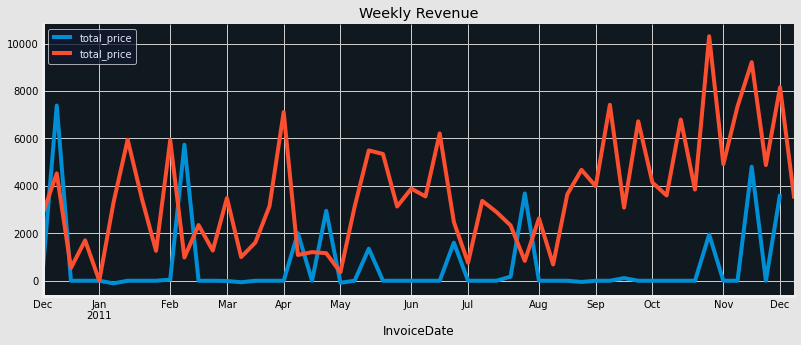

In [76]:
fig, ax = plt.subplots(figsize = (12, 5), facecolor = "#e5e5e5")
ax.set_facecolor("#101820")

weekly_prices1.plot(ax = ax).set_title("Weekly Revenue")
ax.legend(facecolor = "#101820", labelcolor = "#e5e5e5")

weekly_prices2.plot(ax = ax).set_title("Weekly Revenue")
ax.legend(facecolor = "#101830", labelcolor = "#e5e5f6")

sns.despine()
plt.show()

In [77]:
country3= input()

United Kingdom


In [78]:
datax3 = datax[datax.Country == country3]

In [79]:
prices_df3 = pd.DataFrame(datax3.groupby("InvoiceDate").total_price.sum())
prices_df3 = prices_df3.iloc[:-1]
prices_df3

,total_price
InvoiceDate,
2010-12-01 08:26:00,139.12
2010-12-01 08:28:00,22.20
2010-12-01 08:34:00,348.78
2010-12-01 08:35:00,17.85
2010-12-01 09:00:00,204.00
...,...
2011-12-09 12:20:00,145.29
2011-12-09 12:21:00,29.88
2011-12-09 12:23:00,124.60


In [80]:
weekly_prices3 = prices_df3.resample("W").sum()
weekly_prices3.head()

,total_price
InvoiceDate,
2010-12-05,166116.72
2010-12-12,244020.45
2010-12-19,191501.99
2010-12-26,75103.46
2011-01-02,0.00


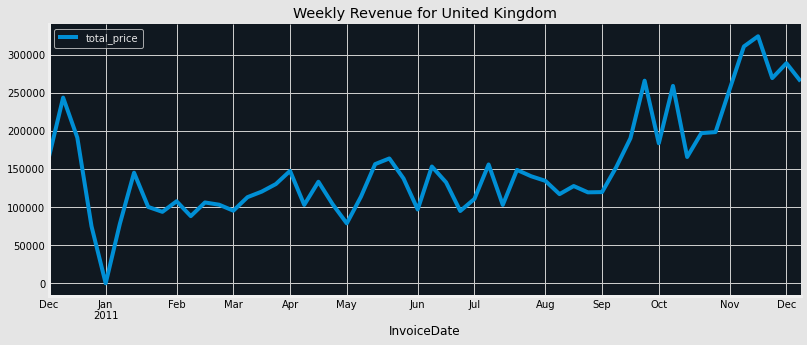

In [81]:
fig, ax = plt.subplots(figsize = (12, 5), facecolor = "#e5e5e5")
ax.set_facecolor("#101820")

weekly_prices3.plot(ax = ax).set_title("Weekly Revenue for United Kingdom")
ax.legend(facecolor = "#101820", labelcolor = "#e5e5e5")

sns.despine()
plt.show()

In [82]:
daily_sales = pd.DataFrame(datax3.groupby("InvoiceDate").sum().resample("D").sum()["total_price"])
daily_sales

,total_price
InvoiceDate,
2010-12-01,54615.15
2010-12-02,46053.93
2010-12-03,39985.44
2010-12-04,0.00
2010-12-05,25462.20
...,...
2011-12-05,54715.25
2011-12-06,50307.31
2011-12-07,55028.58


In [83]:
daily_sales.loc["2010-12-23" : "2011-1-4"]

,total_price
InvoiceDate,
2010-12-23,10186.86
2010-12-24,0.00
2010-12-25,0.00
2010-12-26,0.00
2010-12-27,0.00
2010-12-28,0.00
2010-12-29,0.00
2010-12-30,0.00
2010-12-31,0.00


In [84]:
import numpy as np

In [85]:
daily_sales.reset_index(inplace = True)
daily_sales["Closed"] = np.where((daily_sales.total_price == 0), 1, 0)
daily_sales.set_index("InvoiceDate", inplace = True)

In [86]:
daily_sales["weekday"] = daily_sales.index.day_name()
daily_sales

,total_price,Closed,weekday
InvoiceDate,,,
2010-12-01,54615.15,0,Wednesday
2010-12-02,46053.93,0,Thursday
2010-12-03,39985.44,0,Friday
2010-12-04,0.00,1,Saturday
2010-12-05,25462.20,0,Sunday
...,...,...,...
2011-12-05,54715.25,0,Monday
2011-12-06,50307.31,0,Tuesday
2011-12-07,55028.58,0,Wednesday


In [87]:
daily_sales.groupby("weekday").total_price.sum()

weekday
Friday       1276033.171
Monday       1364079.051
Saturday           0.000
Sunday        707234.501
Thursday     1720142.310
Tuesday      1683364.841
Wednesday    1436952.490
Name: total_price, dtype: float64

In [88]:
daily_sales_workdays = daily_sales[daily_sales.total_price > 0].copy()
daily_sales.drop("weekday", axis = 1, inplace = True)
daily_sales_workdays.drop("weekday", axis = 1, inplace = True)

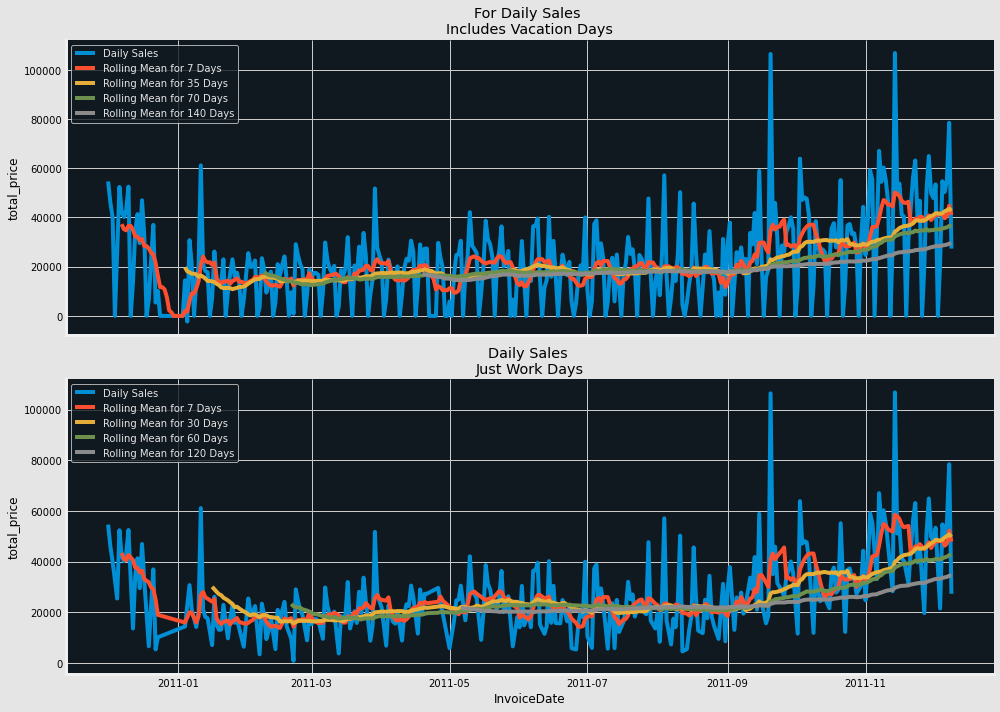

In [89]:
fig, axes = plt.subplots(2, 1, sharex = True, figsize = (14, 10), facecolor = "#e5e5e5")

for ax in axes: ax.set_facecolor("#101820")
    
sns.lineplot(x = daily_sales.index, y = daily_sales.total_price, 
             ax = axes[0], label = "Daily Sales").set_title("For Daily Sales \nIncludes Vacation Days")

sns.lineplot(x = daily_sales.index, y = daily_sales.total_price.rolling(7).mean(), 
             ax = axes[0], label = "Rolling Mean for 7 Days")
sns.lineplot(x = daily_sales.index, y = daily_sales.total_price.rolling(35).mean(), 
             ax = axes[0], label = "Rolling Mean for 35 Days")
sns.lineplot(x = daily_sales.index, y = daily_sales.total_price.rolling(70).mean(), 
             ax = axes[0], label = "Rolling Mean for 70 Days")
sns.lineplot(x = daily_sales.index, y = daily_sales.total_price.rolling(140).mean(), 
             ax = axes[0], label = "Rolling Mean for 140 Days")
sns.lineplot(x = daily_sales_workdays.index, y = daily_sales_workdays.total_price, 
             ax = axes[1], label = "Daily Sales").set_title("Daily Sales \nJust Work Days")

sns.lineplot(x = daily_sales_workdays.index, y = daily_sales_workdays.total_price.rolling(6).mean(), 
             ax = axes[1], label = "Rolling Mean for 7 Days")
sns.lineplot(x = daily_sales_workdays.index, y = daily_sales_workdays.total_price.rolling(30).mean(),
             ax = axes[1], label = "Rolling Mean for 30 Days")
sns.lineplot(x = daily_sales_workdays.index, y = daily_sales_workdays.total_price.rolling(60).mean(), 
             ax = axes[1], label = "Rolling Mean for 60 Days")
sns.lineplot(x = daily_sales_workdays.index, y = daily_sales_workdays.total_price.rolling(120).mean(), 
             ax = axes[1], label = "Rolling Mean for 120 Days")

for ax in axes: ax.legend(facecolor = "#101820", labelcolor = "#e5e5e5")
    
sns.despine()
plt.tight_layout()
plt.show()

### Social Influence on Shopping

#### Loading the data

In [90]:
dfx=spark.read.format("csv").option("header","true").option("inferSchema","true").option("mode","failfast").load("/home/niharika/Downloads/social-influence.csv")

In [91]:
dfx.createOrReplaceTempView("social")

#### Around 1450 people were asked to answer to the question "What social platform has influence your online shopping the most?"

In [92]:
spark.sql("select * from social").show()

+--------------------+-----------+------------------+---------+-----+----------+
|            Question|SegmentType|SegmentDescription|   Answer|Count|Percentage|
+--------------------+-----------+------------------+---------+-----+----------+
|What social platf...|     Mobile|    Global results| Facebook|  548|     0.205|
|What social platf...|     Mobile|    Global results|Instagram|  916|     0.342|
|What social platf...|     Mobile|    Global results| Snapchat|   86|     0.032|
|What social platf...|     Mobile|    Global results|  Twitter|  179|     0.067|
|What social platf...|     Mobile|    Global results|     None|  947|     0.354|
|What social platf...|        Web|               Web| Facebook|    0|       0.0|
|What social platf...|        Web|               Web|Instagram|    0|       0.0|
|What social platf...|        Web|               Web| Snapchat|    0|       0.0|
|What social platf...|        Web|               Web|  Twitter|    0|       0.0|
|What social platf...|      

In [93]:
spark.sql("select distinct(SegmentType) from social").show()

+-----------+
|SegmentType|
+-----------+
|     Custom|
|     Mobile|
|     Gender|
|        Web|
| University|
+-----------+



In [94]:
spark.sql("select distinct(SegmentDescription) from social").show()

+--------------------+
|  SegmentDescription|
+--------------------+
|or private school...|
| New York University|
|in Greek life? Ye...|
|  Cornell University|
|   Butler University|
|    you a virgin? No|
|closely identify ...|
|University of Guelph|
|Wilfred Laurier U...|
| Medford High School|
|your zodiac sign?...|
|University of Mis...|
|University of Sou...|
|Newcastle University|
|  Indiana University|
|    Emory University|
|      Illinois State|
|grow up speaking?...|
|James Madison Uni...|
|Sexual orientatio...|
+--------------------+
only showing top 20 rows



In [95]:
spark.sql("select count(distinct(SegmentDescription)) from social").show()

+----------------------------------+
|count(DISTINCT SegmentDescription)|
+----------------------------------+
|                               289|
+----------------------------------+



In [96]:
spark.sql("select distinct(Answer) from social").show()

+---------+
|   Answer|
+---------+
|     None|
|Instagram|
|  Twitter|
| Snapchat|
| Facebook|
+---------+



In [97]:
spark.sql("select distinct(Question) from social").show()

+--------------------+
|            Question|
+--------------------+
|What social platf...|
+--------------------+



In [98]:
spark.sql("select count(*) from social").show()

+--------+
|count(1)|
+--------+
|    1450|
+--------+



In [99]:
dfx.groupBy("Answer") \
  .agg(sum("Count").alias("Total")) \
  .sort(col("Total").desc()) \
  .show()

+---------+-----+
|   Answer|Total|
+---------+-----+
|     None|18936|
|Instagram|16524|
| Facebook|10329|
|  Twitter| 3407|
| Snapchat| 1574|
+---------+-----+



#### Majority of the people were not influenced by any online platform for shopping, followed by 16524 who were influenced by Instagram.

In [100]:
dfx.groupBy("SegmentType") \
  .agg(sum("Count").alias("Total")) \
  .sort(col("Total").desc()) \
  .show()

+-----------+-----+
|SegmentType|Total|
+-----------+-----+
|     Custom|43241|
|     Gender| 2676|
|     Mobile| 2676|
| University| 2175|
|        Web|    2|
+-----------+-----+



In [101]:
dfx.groupBy("SegmentDescription") \
  .agg(sum("Count").alias("Total")) \
  .sort(col("Total").desc()) \
  .show()

+--------------------+-----+
|  SegmentDescription|Total|
+--------------------+-----+
|      Global results| 2676|
|     I'm in? College| 2325|
|    you a virgin? No| 1696|
|closely identify ...| 1572|
|What's your GPA? ...| 1566|
|         Male voters| 1562|
|clubs / organizat...| 1543|
|student loan debt...| 1528|
|   Mac or PC? Mac 🖥| 1457|
|Sexual orientatio...| 1193|
|do per month? Rea...| 1192|
|       Female voters| 1114|
|  Are you? Christian| 1113|
| in Greek life? Yes!| 1082|
|grow up speaking?...| 1045|
|have a job? Nope,...|  927|
|Graduation Year 2019|  844|
|What's your leani...|  834|
|you vote for? Hil...|  833|
|are you pursuing?...|  794|
+--------------------+-----+
only showing top 20 rows



In [102]:
dfx.groupBy("SegmentType","Answer") \
  .agg(sum("Count").alias("Total")) \
  .sort(col("Total").desc()) \
  .show()

+-----------+---------+-----+
|SegmentType|   Answer|Total|
+-----------+---------+-----+
|     Custom|     None|16277|
|     Custom|Instagram|13964|
|     Custom| Facebook| 8747|
|     Custom|  Twitter| 2918|
|     Custom| Snapchat| 1335|
|     Gender|     None|  949|
|     Mobile|     None|  947|
|     Mobile|Instagram|  916|
|     Gender|Instagram|  915|
| University|     None|  761|
| University|Instagram|  729|
|     Gender| Facebook|  548|
|     Mobile| Facebook|  548|
| University| Facebook|  486|
|     Mobile|  Twitter|  179|
|     Gender|  Twitter|  179|
| University|  Twitter|  131|
|     Mobile| Snapchat|   86|
|     Gender| Snapchat|   85|
| University| Snapchat|   68|
+-----------+---------+-----+
only showing top 20 rows



In [103]:
dfx.groupBy("Answer","SegmentType") \
  .agg(sum("Count").alias("Total")) \
  .sort(col("Answer").desc()) \
  .show(30)

+---------+-----------+-----+
|   Answer|SegmentType|Total|
+---------+-----------+-----+
|  Twitter|     Gender|  179|
|  Twitter| University|  131|
|  Twitter|     Custom| 2918|
|  Twitter|        Web|    0|
|  Twitter|     Mobile|  179|
| Snapchat|     Custom| 1335|
| Snapchat|        Web|    0|
| Snapchat| University|   68|
| Snapchat|     Mobile|   86|
| Snapchat|     Gender|   85|
|     None|     Custom|16277|
|     None|     Gender|  949|
|     None|     Mobile|  947|
|     None| University|  761|
|     None|        Web|    2|
|Instagram|     Custom|13964|
|Instagram| University|  729|
|Instagram|     Gender|  915|
|Instagram|     Mobile|  916|
|Instagram|        Web|    0|
| Facebook| University|  486|
| Facebook|     Custom| 8747|
| Facebook|        Web|    0|
| Facebook|     Mobile|  548|
| Facebook|     Gender|  548|
+---------+-----------+-----+



In [104]:
dfx.groupBy("Answer","SegmentDescription") \
  .agg(sum("Count").alias("Total")) \
  .sort(col("Answer").desc()) \
  .show(30)

+-------+--------------------+-----+
| Answer|  SegmentDescription|Total|
+-------+--------------------+-----+
|Twitter|Truman State Univ...|    2|
|Twitter|grow up speaking?...|   76|
|Twitter|Seton Hall Univer...|    1|
|Twitter|your zodiac sign?...|   10|
|Twitter|University of Mou...|    0|
|Twitter|    Colorado Academy|    0|
|Twitter|    you a virgin? No|  108|
|Twitter|closely identify ...|    1|
|Twitter|University of Flo...|    1|
|Twitter|         Male voters|  122|
|Twitter|your zodiac sign?...|    6|
|Twitter|  University of Iowa|    1|
|Twitter|closely identify ...|    2|
|Twitter| Medford High School|    0|
|Twitter|Graduation Year 2020|   47|
|Twitter|Newcastle University|    0|
|Twitter|What's your major...|    1|
|Twitter|clubs / organizat...|    2|
|Twitter|California State ...|    0|
|Twitter|or private school...|   69|
|Twitter|      Illinois State|    0|
|Twitter|Santa Clara Unive...|    0|
|Twitter|you vote for? Wri...|    8|
|Twitter|What's your major...|   14|
|

In [105]:
dfx.groupBy("SegmentType","SegmentDescription") \
  .agg(sum("Count").alias("Total")) \
  .sort(col("SegmentType").desc()) \
  .show(30)

+-----------+--------------------+-----+
|SegmentType|  SegmentDescription|Total|
+-----------+--------------------+-----+
|        Web|                 Web|    2|
| University|   Kalamazoo College|    1|
| University|Baltimore City Co...|    1|
| University|   Butler University|   33|
| University|    Arbroath Academy|    1|
| University|Northwestern Univ...|  115|
| University| Wesleyan University|    1|
| University|Johns Hopkins Uni...|   12|
| University|University of Cal...|    1|
| University|   Baylor University|    1|
| University|Randolph-Macon Co...|    7|
| University|Stephen F. Austin...|    1|
| University|University of Mis...|   24|
| University|Indiana Universit...|    1|
| University|United States Mil...|    1|
| University|University of Not...|    1|
| University|University of Cen...|    2|
| University|West Virginia Uni...|    2|
| University|Texas Christian U...|   23|
| University|Saginaw Valley St...|    1|
| University|Wake Forest Unive...|    1|
| University|Boi

In [106]:
dfx.groupBy("Answer","SegmentType","SegmentDescription") \
  .agg(sum("Count").alias("Total")) \
  .sort(col("Answer").desc()) \
  .show(30)

+-------+-----------+--------------------+-----+
| Answer|SegmentType|  SegmentDescription|Total|
+-------+-----------+--------------------+-----+
|Twitter|     Gender|         Male voters|  122|
|Twitter| University|Arkansas Tech Uni...|    0|
|Twitter| University|University of Del...|    0|
|Twitter| University|  Cornell University|    1|
|Twitter| University|Hampden-Sydney Co...|    0|
|Twitter| University|Seton Hall Univer...|    1|
|Twitter|     Custom|your parents make...|   10|
|Twitter|     Custom|your zodiac sign?...|    9|
|Twitter| University|  Clemson University|    0|
|Twitter| University|  Chapman University|    0|
|Twitter| University|University of Cen...|    0|
|Twitter|     Custom|do per month? 1 t...|   27|
|Twitter| University|University of Min...|    0|
|Twitter|     Custom|Sexual orientatio...|    7|
|Twitter| University|University of Mon...|    0|
|Twitter| University|Grand Valley Stat...|    0|
|Twitter| University|Universidad Nacio...|    0|
|Twitter| University

In [107]:
!pip install plotly

In [108]:
datay=dfx.toPandas()

In [109]:
npie1=datay.groupby(["Answer"]).sum()

In [110]:
npie1=npie1.reset_index()

In [111]:
npie1.columns

Index(['Answer', 'Count', 'Percentage'], dtype='object')

In [112]:
npie1["Answer"]

0     Facebook
1    Instagram
2         None
3     Snapchat
4      Twitter
Name: Answer, dtype: object

In [113]:
pie1=pd.DataFrame({"Answer":npie1["Answer"],"Count":npie1["Count"]})

In [114]:
pie1

,Answer,Count
0,Facebook,10329
1,Instagram,16524
2,None,18936
3,Snapchat,1574
4,Twitter,3407


In [115]:
import plotly.express as px

In [116]:
fig = px.pie(pie1, values='Count', names='Answer' )

In [117]:
fig.show()

#### The above pie plot shows the different online platforms from where the customers are influenced for online shopping.

In [118]:
npie2=datay.groupby(["SegmentType"]).sum()

In [119]:
npie2

,Count,Percentage
SegmentType,,
Custom,43241,111.012
Gender,2676,1.999
Mobile,2676,1.000
University,2175,173.993
Web,2,1.000


In [120]:
npie2=npie2.reset_index()

In [121]:
npie2.columns

Index(['SegmentType', 'Count', 'Percentage'], dtype='object')

In [122]:
pie2=pd.DataFrame({"SegmentType":npie2["SegmentType"],"Count":npie2["Count"]})

In [123]:
fig = px.pie(pie2, values='Count', names='SegmentType' )
fig.show()

#### From the above plot we can observe the different sectors from where the survey was performed.

In [124]:
fig=px.histogram(datay,x='SegmentType', color='Answer', barmode='group')
fig.show()

#### From the above graph we can observe the number of records on different platforms in different sectors.

In [125]:
fig=px.histogram(datay,x='SegmentDescription', color='Answer', barmode='group')
fig.show()

#### From the above plot we can observe the different questions enquired by customers on different platforms.